In [1]:
import io
import torch

from PIL import Image
import requests
from matplotlib.pyplot import imshow

from torch.autograd import Variable
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageNet

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
!pip-3.6 list | grep torchvision

torchvision         0.4.0    


### data preparation

First of all we need an image to predict. We use `Pillow` to open image and `matplotlib` to show it inline.

Here is a brief overview of `Pillow` from wiki:

>Python Imaging Library (abbreviated as PIL) (in newer versions known as Pillow) is a free library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats. It is available for Windows, Mac OS X and Linux. The latest version of PIL is 1.1.7, was released in September 2009 and supports Python 1.5.2–2.7, with Python 3 support to be released "later".[3]
Development appears to be discontinued with the last commit to the PIL repository coming in 2011.[2] Consequently, a successor project called Pillow has forked the PIL repository and added Python 3.x support.[4] This fork has been adopted as a replacement for the original PIL in Linux distributions including Debian[5] and Ubuntu (since 13.04).[6]

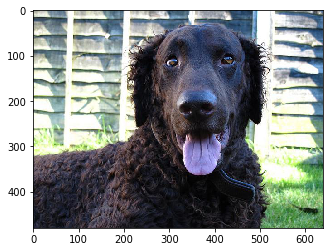

In [3]:
filename = 'images/Curly-coated_retriever_03896.jpg'
img = Image.open(filename)
imshow(img);

Now we need to process this image:

- resize the `img` for the requirements of `VGG` (square image `224x224`);
- normalize it, as noted in the `pytorch` pretrained models doc, with, `mean = [0.485, 0.456, 0.406]` and `std = [0.229, 0.224, 0.225]`;
- convert it to a `pytorch` `tensor`;

These transformations are specified in `pytorch` [documentation and examples](https://pytorch.org/docs/stable/torchvision/models.html) and also reproduced in `udacity` transfer learning notebook.

In [4]:
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

In [5]:
img = test_transforms(img)

In [6]:
img.shape

torch.Size([3, 224, 224])

We also need to add `batch_size` to feed this image into `VGG` net:

>All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]

In [7]:
img = img.unsqueeze(dim=0)

In [8]:
img.shape

torch.Size([1, 3, 224, 224])

In [9]:
img = Variable(img)

### model - no `GPU`

Now we may instantiate our model and get the prediction. 

We also have to call `eval()` method:

>Some models use modules which have different training and evaluation behavior, such as batch normalization. To switch between these modes, use model.train() or model.eval() as appropriate. See train() or eval() for details.

We get unnormalized `scores`. To get the class we have to manually call `argmax()`.

In [10]:
VGG16 = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/ilyarudyak/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [01:16<00:00, 7.21MB/s] 


In [11]:
VGG16.eval();

In [12]:
prediction = VGG16(img)

In [13]:
prediction.shape

torch.Size([1, 1000])

In [14]:
prediction[0, :10]

tensor([-2.6350, -2.8259, -0.9964, -2.1065, -1.8332, -1.4013, -0.5193,  0.9418,
         2.8092,  1.0915], grad_fn=<SliceBackward>)

In [15]:
pred_class = prediction.data.numpy().argmax()

In [16]:
pred_class

206

That's `"curly-coated_retriever"`. And the name of our file is `Curly-coated_retriever_03896.jpg`. So this is perfectly correct prediction. This concludes our prediction analysis.